In [13]:
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

In [14]:
corr = np.array([[1, 0.9, 0.75, 0.8],
                 [0.9, 1, 0.87, 0.85],
                 [0.75, 0.87, 1, 0.92],
                 [0.8, 0.85, 0.92, 1]])

n = len(corr)
M = [[0]*n for _ in range(n)]

for i in range(n):
    for ii in range(i+1):
        summ = sum(M[i][j]*M[ii][j] for j in range(ii))

        if i == ii:
            M[i][ii] = np.sqrt(corr[i][ii] - summ)
        else:
            M[i][ii] = (1.0 / M[ii][ii]) * (corr[i][ii] - summ)

print(M)

[[1.0, 0, 0, 0], [0.9, 0.4358898943540673, 0, 0], [0.75, 0.4473606810475954, 0.4872047013860105, 0], [0.8, 0.2982404540317301, 0.38295801916040056, 0.35269786948561166]]


In [15]:
def getChol(corr):
    chol = scipy.linalg.cholesky(corr, lower=True)
    return chol, chol.T, np.matmul(chol, chol.T)

getChol(corr)

(array([[1.        , 0.        , 0.        , 0.        ],
        [0.9       , 0.43588989, 0.        , 0.        ],
        [0.75      , 0.44736068, 0.4872047 , 0.        ],
        [0.8       , 0.29824045, 0.38295802, 0.35269787]]),
 array([[1.        , 0.9       , 0.75      , 0.8       ],
        [0.        , 0.43588989, 0.44736068, 0.29824045],
        [0.        , 0.        , 0.4872047 , 0.38295802],
        [0.        , 0.        , 0.        , 0.35269787]]),
 array([[1.  , 0.9 , 0.75, 0.8 ],
        [0.9 , 1.  , 0.87, 0.85],
        [0.75, 0.87, 1.  , 0.92],
        [0.8 , 0.85, 0.92, 1.  ]]))

In [16]:
rand = np.random.normal(size=(4, 1000))
dfunc = pd.DataFrame(rand, index=["X","Y","Z","W"]).T/100
print(dfunc.corr())

          X         Y         Z         W
X  1.000000 -0.026748 -0.009293  0.022833
Y -0.026748  1.000000 -0.019353 -0.005285
Z -0.009293 -0.019353  1.000000 -0.029437
W  0.022833 -0.005285 -0.029437  1.000000


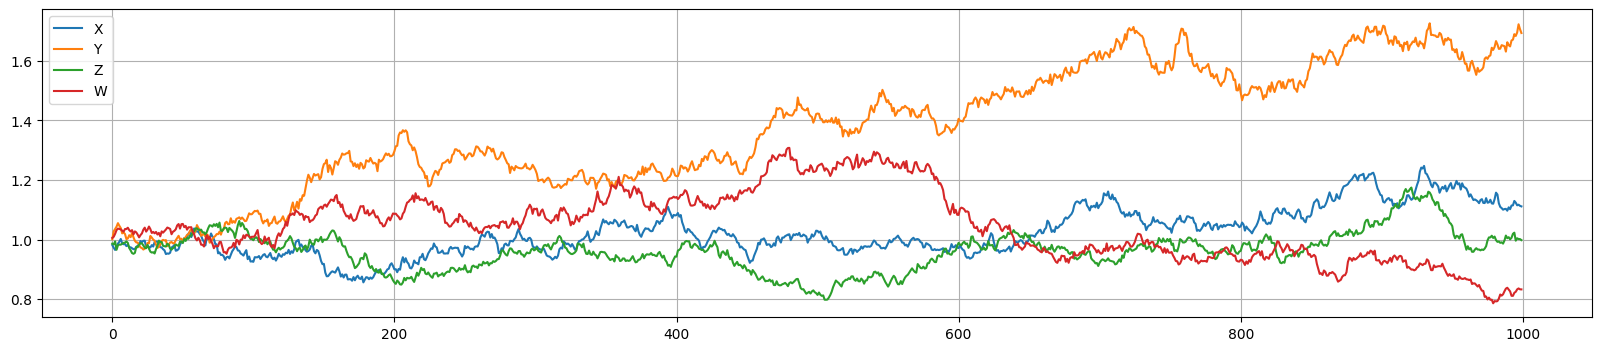

In [17]:
cumret1 = (1 + dfunc).cumprod()

plt.figure(figsize=(20, 4))
plt.plot(cumret1)
plt.legend(["X", "Y", "Z", "W"])
plt.grid(True)
plt.show()

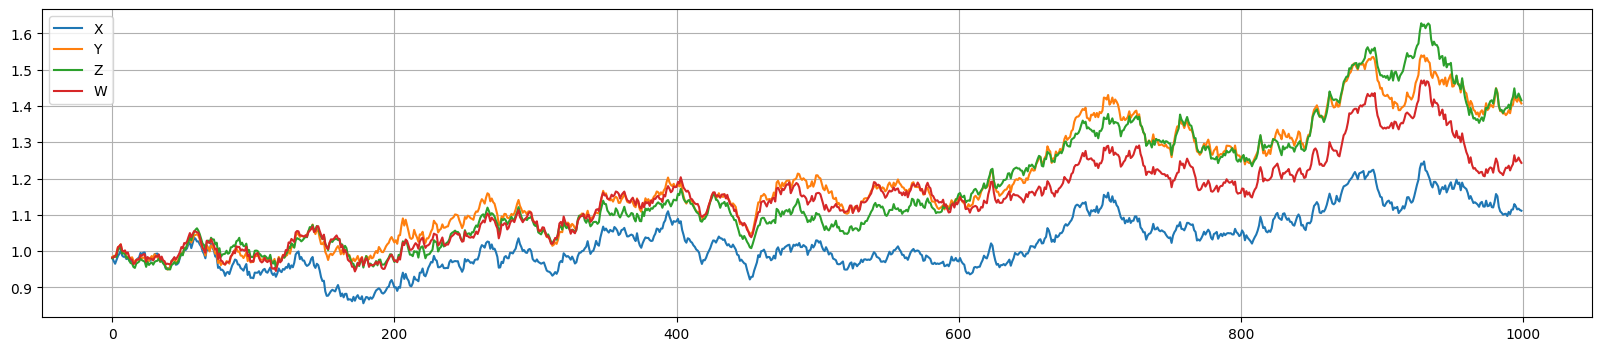

          X         Y         Z         W
X  1.000000  0.897588  0.747878  0.798959
Y  0.897588  1.000000  0.868292  0.844983
Z  0.747878  0.868292  1.000000  0.907915
W  0.798959  0.844983  0.907915  1.000000


In [18]:
chol = scipy.linalg.cholesky(corr, lower=True)

dfcorr = pd.DataFrame(np.matmul(chol, rand), index=["X","Y","Z","W"]).T/100
cumret2 = (1+dfcorr).cumprod()

plt.figure(figsize=(20, 4))
plt.plot(cumret2)
plt.legend(["X", "Y", "Z", "W"])
plt.grid(True)
plt.show()

print(dfcorr.corr())

In [19]:
#Real data application:

realdf = pd.read_excel(r"C:\Users\gabri\Desktop\Personale + lavoro\GHProject\GH2\Data.xlsx", parse_dates=["Date"]).bfill()
realdf = realdf.set_index("Date")

print(realdf)

returns = np.log(realdf/realdf.shift(1)).bfill()
print(returns)

               LDO   ECK      STL     BRE
Date                                     
2015-01-01   7.735  13.6   4.9744   5.540
2015-01-02   7.730  13.6   5.0132   5.566
2015-01-05   7.430  13.6   4.9044   5.510
2015-01-06   7.350  13.6   4.9822   5.422
2015-01-07   7.465  13.6   5.0262   5.364
...            ...   ...      ...     ...
2024-01-10  16.635  21.5  20.7800  10.990
2024-01-11  16.960  21.5  20.6100  11.000
2024-01-12  17.275  21.7  20.4550  11.070
2024-01-15  17.040  21.7  20.1350  10.980
2024-01-16  17.095  21.3  19.9160  11.150

[2359 rows x 4 columns]
                 LDO       ECK       STL       BRE
Date                                              
2015-01-01 -0.000647  0.000000  0.007770  0.004682
2015-01-02 -0.000647  0.000000  0.007770  0.004682
2015-01-05 -0.039583  0.000000 -0.021942 -0.010112
2015-01-06 -0.010826  0.000000  0.015739 -0.016100
2015-01-07  0.015525  0.000000  0.008793 -0.010755
...              ...       ...       ...       ...
2024-01-10  0.010576 

In [20]:
realcorr = returns.corr()
print(realcorr)

eigvals = np.linalg.eigvals(realcorr)


realchol = np.linalg.cholesky(realcorr)
print(realchol)

          LDO       ECK       STL       BRE
LDO  1.000000  0.095654  0.469086  0.362176
ECK  0.095654  1.000000  0.114704  0.116395
STL  0.469086  0.114704  1.000000  0.495907
BRE  0.362176  0.116395  0.495907  1.000000
[[1.         0.         0.         0.        ]
 [0.09565369 0.99541467 0.         0.        ]
 [0.4690865  0.07015633 0.88036126 0.        ]
 [0.3621758  0.08212863 0.36377456 0.85425502]]


In [21]:
dT = 126 / 252  
num_simulations = 1000
num_days = 252
simulatedret = {}

for stock in returns.columns:
    mean = returns[stock].mean()
    variance = returns[stock].var()
    drift = (mean - 0.5 * variance) * dT
    volatility = np.sqrt(variance * dT)
    daily_returns = drift + volatility * np.random.normal(0, 1, (num_days, num_simulations))

    simulatedret[stock] = daily_returns

           LDO        ECK        STL        BRE
0    17.107268  21.556168  20.022228  11.230854
1    17.427133  21.549300  20.188782  11.563039
2    17.378435  21.726908  19.822442  11.688131
3    17.565398  21.742738  20.132085  11.774801
4    17.815269  21.864886  19.785790  11.821604
..         ...        ...        ...        ...
247  13.228140  25.870219  17.638339  11.372536
248  13.145409  26.601875  17.172323  11.321859
249  13.571650  26.688840  17.455029  11.401648
250  13.657280  26.774789  17.191665  11.359198
251  13.896205  27.162763  17.140383  11.257953

[252 rows x 4 columns]


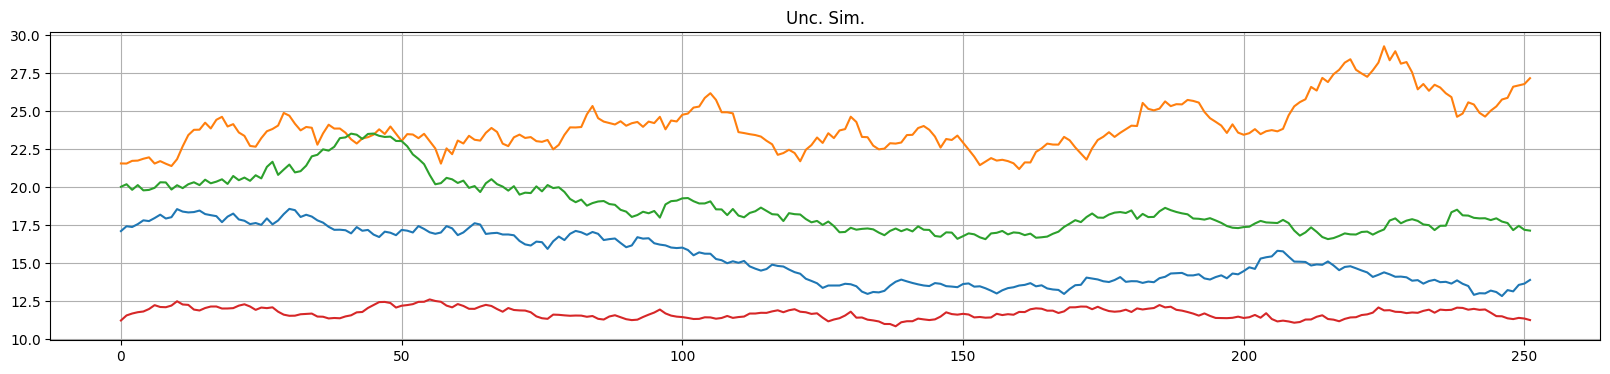

,LDO,ECK,STL,BRE
LDO,1.000000,-0.209417,0.814031,0.326476
ECK,-0.209417,1.000000,-0.245233,-0.189687
STL,0.814031,-0.245233,1.000000,0.447116
BRE,0.326476,-0.189687,0.447116,1.000000


In [22]:
most_probable_path = {}

for stock, stock_simulations in simulatedret.items():
    mean_simulation = np.mean(stock_simulations, axis=1)
    distances = np.linalg.norm(stock_simulations - mean_simulation[:, np.newaxis], axis=0)
    min_distance_path = stock_simulations[:, np.argmin(distances)]
    most_probable_path[stock] = min_distance_path

most_probable_path_df = pd.DataFrame(most_probable_path)


prices = most_probable_path_df.copy()

for stock in prices.columns:
    initial_price = realdf[stock].iloc[-1]
    prices[stock] = initial_price * np.exp(prices[stock].cumsum())

prices_simulated = pd.DataFrame(prices)

print(prices_simulated)

plt.figure(figsize=(20, 4))
plt.plot(prices_simulated)
plt.grid(True)
plt.title("Unc. Sim.")
plt.show()


prices_simulated.corr()

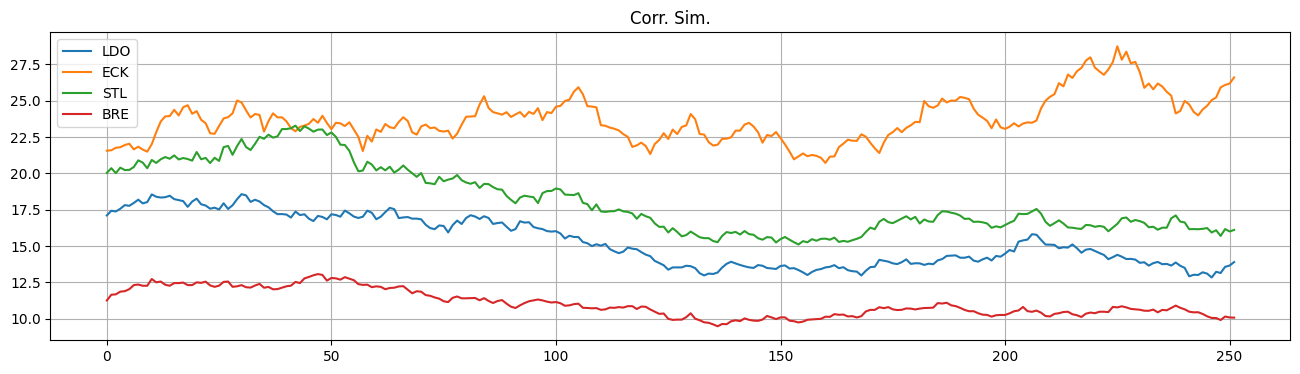

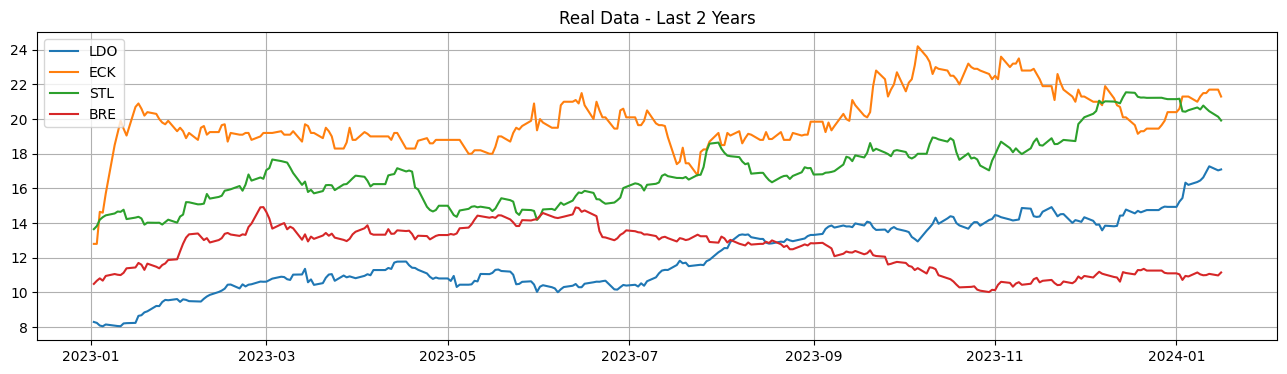

In [23]:

correlated_returns = np.dot(realchol, most_probable_path_df.T)
correlated_returns_df = pd.DataFrame(correlated_returns.T, columns=['LDO', 'ECK', 'STL', 'BRE'])


priceschol = correlated_returns_df.copy()

for stock in correlated_returns_df.columns:
    initial_price = realdf[stock].iloc[-1]
    priceschol[stock] = initial_price * np.exp(priceschol[stock].cumsum())


plt.figure(figsize=(16, 4))
plt.plot(priceschol)
plt.grid(True)
plt.legend(['LDO', 'ECK', 'STL', 'BRE'])
plt.title("Corr. Sim.")
plt.show()


last_two_years = realdf.loc[realdf.index.year >= realdf.index.max().year - 1]

plt.figure(figsize=(16, 4))
plt.plot(last_two_years)
plt.grid(True)
plt.legend(['LDO', 'ECK', 'STL', 'BRE'])
plt.title("Real Data - Last 2 Years")
plt.show()

In [24]:
print(correlated_returns_df.corr())
print(realcorr)

          LDO       ECK       STL       BRE
LDO  1.000000 -0.006389  0.513754  0.425391
ECK -0.006389  1.000000  0.141729  0.120573
STL  0.513754  0.141729  1.000000  0.595526
BRE  0.425391  0.120573  0.595526  1.000000
          LDO       ECK       STL       BRE
LDO  1.000000  0.095654  0.469086  0.362176
ECK  0.095654  1.000000  0.114704  0.116395
STL  0.469086  0.114704  1.000000  0.495907
BRE  0.362176  0.116395  0.495907  1.000000
